In [41]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [42]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [44]:
from torch import nn

In [45]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x
print(nn.Linear(2, 7))

Linear(in_features=2, out_features=7, bias=True)


In [46]:
mynet = MyNeuralNet().to(device)
print(mynet.input_to_hidden_layer.weight)

Parameter containing:
tensor([[ 0.3697, -0.4343],
        [ 0.3398,  0.0915],
        [ 0.2687,  0.2649],
        [-0.5093,  0.6012],
        [ 0.6679,  0.6382],
        [ 0.4016,  0.1500],
        [-0.4313, -0.0819],
        [ 0.6581, -0.1315]], requires_grad=True)


In [47]:
mynet.parameters()
for param in mynet.parameters():
    print(param)

Parameter containing:
tensor([[ 0.3697, -0.4343],
        [ 0.3398,  0.0915],
        [ 0.2687,  0.2649],
        [-0.5093,  0.6012],
        [ 0.6679,  0.6382],
        [ 0.4016,  0.1500],
        [-0.4313, -0.0819],
        [ 0.6581, -0.1315]], requires_grad=True)
Parameter containing:
tensor([-0.6226,  0.1893,  0.6316,  0.0589, -0.5463, -0.6132, -0.2361, -0.0047],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0178,  0.2916,  0.3280,  0.2300,  0.2391, -0.2264, -0.0954, -0.1076]],
       requires_grad=True)
Parameter containing:
tensor([0.0637], requires_grad=True)


In [48]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.parameter(torch.rand(2,8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.parameter(torch.rand(8,1))
    def forward(self, x):
        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x

In [49]:
loss_func = nn.MSELoss()
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(53.6500, grad_fn=<MseLossBackward0>)


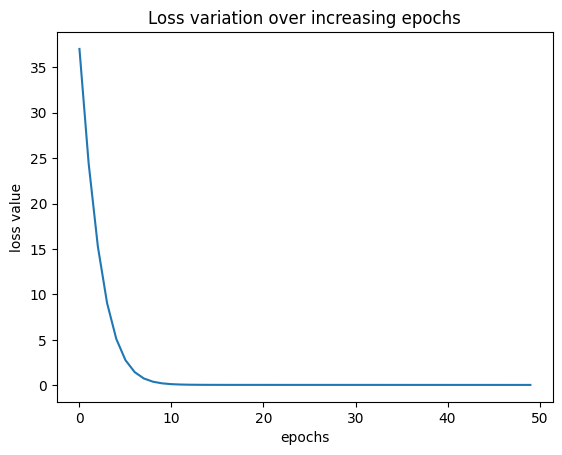

In [50]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)
opt.zero_grad()
loss_value = loss_func(mynet(X),Y)
loss_value.backward()
opt.step()
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.show()

In [51]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [52]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [53]:
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x.clone().detach() # torch.tensor(x).float()
        self.y = y.clone().detach() # torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)
for x, y in dl:
    print(x, y)

tensor([[5., 6.],
        [3., 4.]]) tensor([[11.],
        [ 7.]])
tensor([[1., 2.],
        [7., 8.]]) tensor([[ 3.],
        [15.]])


In [54]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(mynet(x),y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

0.04148077964782715


In [55]:
val_x = [[10,11]]
val_x = torch.tensor(val_x).float().to(device)
print(mynet(val_x))

tensor([[20.9525]], grad_fn=<AddmmBackward0>)


In [56]:
print(mynet.hidden_layer_activation(mynet.input_to_hidden_layer(X)))

tensor([[ 0.0000,  0.2069,  0.4333,  2.6133,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.9001,  6.2739,  0.0000,  1.0219,  0.0000,  0.2386],
        [ 0.0000,  0.0000,  3.3669,  9.9344,  0.0000,  2.0513,  0.0000,  0.8057],
        [ 0.0000,  0.0000,  4.8337, 13.5950,  0.0000,  3.0806,  0.0000,  1.3728]],
       grad_fn=<ReluBackward0>)


In [57]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        x = self.hidden_to_output_layer(hidden2)
        return x, hidden2
print(mynet(X)[1])

tensor([7.0239], grad_fn=<SelectBackward0>)


In [58]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [59]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float().to(device)
        self.y = torch.tensor(y).float().to(device)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    def __len__(self): 
        return len(self.x)

In [60]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [61]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [62]:
from torchsummary import summary
print(summary(model, (2,)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              24
              ReLU-2                    [-1, 8]               0
            Linear-3                    [-1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
None


In [63]:
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix),iy)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value.item())
end = time.time()
print(end - start)

0.04225349426269531


In [64]:
val = [[8,9],[10,11],[1.5,2.5]]
val = torch.tensor(val).float()
print(model(val.to(device)))
"""
tensor([[16.7774],
        [20.6186],
        [ 4.2415]], device='cuda:0', grad_fn=<AddmmBackward>)
"""

tensor([[16.4078],
        [19.9959],
        [ 4.7392]], grad_fn=<AddmmBackward0>)


"\ntensor([[16.7774],\n        [20.6186],\n        [ 4.2415]], device='cuda:0', grad_fn=<AddmmBackward>)\n"

In [65]:
print(model.state_dict())
"""
OrderedDict([('0.weight', tensor([[-0.4732,  0.1934],
        [ 0.1475, -0.2335],
        [-0.2586,  0.0823],
        [-0.2979, -0.5979],
        [ 0.2605,  0.2293],
        [ 0.0566,  0.6848],
        [-0.1116, -0.3301],
        [ 0.0324,  0.2609]], device='cuda:0')), ('0.bias', tensor([ 0.6835,  0.2860,  0.1953, -0.2162,  0.5106,  0.3625,  0.1360,  0.2495],
       device='cuda:0')), ('2.weight', tensor([[ 0.0475,  0.0664, -0.0167, -0.1608, -0.2412, -0.3332, -0.1607, -0.1857]],
       device='cuda:0')), ('2.bias', tensor([0.2595], device='cuda:0'))])
"""

OrderedDict([('0.weight', tensor([[ 0.6059, -0.4322],
        [-0.1862,  0.8682],
        [ 0.7145,  0.6638],
        [-0.5633, -0.1499],
        [-0.0699,  0.1090],
        [-0.3214, -0.5993],
        [ 0.3722,  0.1774],
        [ 0.2688, -0.5872]])), ('0.bias', tensor([-0.6759,  0.4308,  0.5722,  0.5055, -0.1425, -0.3093, -0.6747, -0.2187])), ('2.weight', tensor([[-0.0086,  0.5897,  0.9409, -0.0509, -0.0026,  0.0218,  0.1758,  0.3127]])), ('2.bias', tensor([0.2042]))])


"\nOrderedDict([('0.weight', tensor([[-0.4732,  0.1934],\n        [ 0.1475, -0.2335],\n        [-0.2586,  0.0823],\n        [-0.2979, -0.5979],\n        [ 0.2605,  0.2293],\n        [ 0.0566,  0.6848],\n        [-0.1116, -0.3301],\n        [ 0.0324,  0.2609]], device='cuda:0')), ('0.bias', tensor([ 0.6835,  0.2860,  0.1953, -0.2162,  0.5106,  0.3625,  0.1360,  0.2495],\n       device='cuda:0')), ('2.weight', tensor([[ 0.0475,  0.0664, -0.0167, -0.1608, -0.2412, -0.3332, -0.1607, -0.1857]],\n       device='cuda:0')), ('2.bias', tensor([0.2595], device='cuda:0'))])\n"

In [66]:
save_path = 'mymodel.pth'
torch.save(model.state_dict(), save_path)

In [67]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)


In [68]:
state_dict = torch.load('mymodel.pth')

In [69]:
model.load_state_dict(state_dict)
model.to(device)

val = [[8,9],[10,11],[1.5,2.5]]
val = torch.tensor(val).float()
model(val.to(device))

tensor([[16.4078],
        [19.9959],
        [ 4.7392]], grad_fn=<AddmmBackward0>)